In [4]:
# Import Libraries 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Sentiment Analysis

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from textblob import TextBlob
from nltk.util import ngrams
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [5]:
# Read Data sets into the notebook
trump_df = pd.read_csv(r"us-election-2020-tweets/hashtag_donaldtrump.csv",lineterminator='\n')
biden_df = pd.read_csv(r"us-election-2020-tweets/hashtag_joebiden.csv",lineterminator='\n')

In [6]:
trump_df['country']=trump_df['country'].replace({"United States of America" : "US", "United States" : "US"})
biden_df['country']=biden_df['country'].replace({"United States of America" : "US", "United States" : "US"})
trump_df = trump_df[(trump_df.country == "US")]
biden_df = biden_df[(biden_df.country == "US")]

In [7]:
# Check shape of both data frames
print(trump_df.shape)
print(biden_df.shape)

(213263, 21)
(181137, 21)


In [8]:
# Check Info of both data sets

print(trump_df.info())
print(biden_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213263 entries, 0 to 970905
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            213263 non-null  object 
 1   tweet_id              213263 non-null  float64
 2   tweet                 213263 non-null  object 
 3   likes                 213263 non-null  float64
 4   retweet_count         213263 non-null  float64
 5   source                213247 non-null  object 
 6   user_id               213263 non-null  float64
 7   user_name             213262 non-null  object 
 8   user_screen_name      213263 non-null  object 
 9   user_description      200815 non-null  object 
 10  user_join_date        213263 non-null  object 
 11  user_followers_count  213263 non-null  float64
 12  user_location         213263 non-null  object 
 13  lat                   213263 non-null  float64
 14  long                  213263 non-null  float64
 15  

In [9]:
# Adding a new column to differentiate between tweets of Biden and Trump
trump_df["Candidate"] = "TRUMP"
biden_df["Candidate"] = "BIDEN"

In [10]:
# Concat the data frames
Data_Mixed = pd.concat([trump_df,biden_df])
Data_Mixed.sort_values(by='created_at')
Data_Mixed.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,Candidate
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,US,North America,Florida,FL,2020-10-21 00:00:00,TRUMP
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,US,North America,Oregon,OR,2020-10-21 00:00:00.746433060,TRUMP
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,Washington DC,38.894992,-77.036558,Washington,US,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,TRUMP
5,2020-10-15 00:00:17,1.316529e+18,@CLady62 Her 15 minutes were over long time ag...,2.0,0.0,Twitter for Android,1.138416e+09,Farris Flagg,FarrisFlagg,#BidenHarris2020 #JoeBiden2020 #KamalaHarrisFo...,...,"Perris,California",33.782519,-117.228648,NaN,US,North America,California,CA,2020-10-21 00:00:01.866082651,TRUMP
7,2020-10-15 00:00:18,1.316529e+18,@DeeviousDenise @realDonaldTrump @nypost There...,0.0,0.0,Twitter for iPhone,9.007611e+17,Stacey Gulledge 🇺🇸 Patriot ♥️ KAG 🙏 👮‍♀️♥️,sm_gulledge,"Patriot, Wife, “Shaken not Stirred” Mom of two...",...,"Ohio, USA",40.225357,-82.688140,NaN,US,North America,Ohio,OH,2020-10-21 00:00:02.612515712,TRUMP


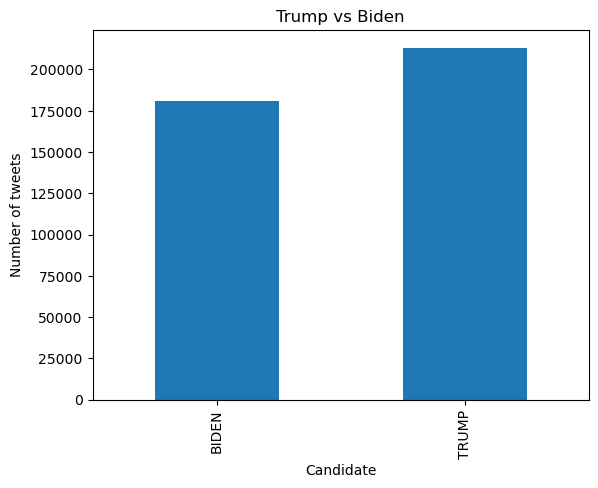

In [11]:
# Plot the number of tweets for each candidate
Data_Mixed.groupby('Candidate')['tweet'].count().plot.bar()
plt.ylabel('Number of tweets')
plt.title('Trump vs Biden')
plt.show()


In [12]:
# Twwets for Biden and Trump from each state in top10 states
state_df = Data_Mixed.groupby(['state','Candidate'])['tweet'].count().sort_values(ascending=False).head(20).reset_index()
state_df

,state,Candidate,tweet
0,California,TRUMP,31149
1,California,BIDEN,25817
2,New York,TRUMP,22881
3,New York,BIDEN,21005
4,Florida,TRUMP,16559
5,Texas,TRUMP,16491
6,Texas,BIDEN,14191
7,Florida,BIDEN,13278
8,District of Columbia,TRUMP,9684
9,District of Columbia,BIDEN,7055


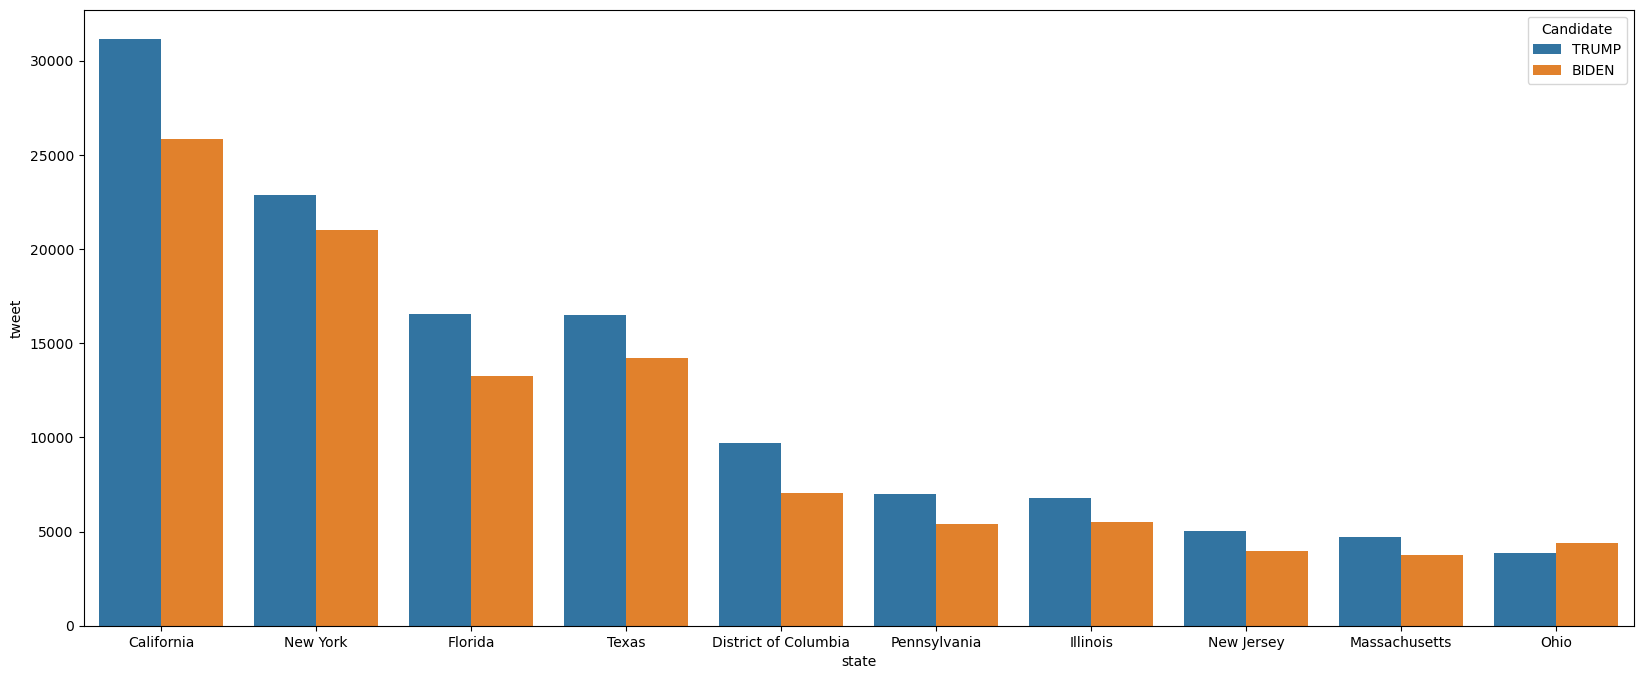

In [13]:
#Plot top 10 states with highest number of tweets for trump and biden
plt.figure(figsize=(20,8))
sns.barplot(data=state_df,x='state',y='tweet',hue='Candidate')
plt.show()

In [14]:
def clean(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'[^\w]', ' ', text)
    return text

In [15]:
# create fuction to get the subjectivity and polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
def getAnalysis(score):
    if score < 0:
        return 'negative'
    elif score==0:
        return 'neutral'
    else:
        return 'positive'

In [17]:
#TRUMP TWEETS

Trump_Tweets = Data_Mixed.query('(Candidate == "TRUMP")').sort_values('user_followers_count',ascending = False).drop_duplicates(['user_name'])[['tweet','country','state']]
Trump_Tweets = Trump_Tweets.dropna().loc[Trump_Tweets.country == 'US']

Trump_Tweets.reset_index(inplace = True, drop = True)

Trump_Tweets['ClearTweet'] = Trump_Tweets['tweet'].apply(clean)

Trump_Tweets['subjectivity']= Trump_Tweets['ClearTweet'].apply(getSubjectivity)
Trump_Tweets['polarity']    = Trump_Tweets['ClearTweet'].apply(getPolarity)
Trump_Tweets['analysis']    = Trump_Tweets['polarity'].apply(getAnalysis)


Trump_Tweets.head()

,tweet,country,state,ClearTweet,subjectivity,polarity,analysis
0,"Without a doubt, the #FourSeasons debacle is t...",US,California,without a doubt the fourseasons debacle is th...,0.483333,0.333333,positive
1,"President Donald #Trump’s youngest daughter, T...",US,Illinois,president donald trump s youngest daughter ti...,0.000000,0.000000,neutral
2,Woah. Have you read this article?\n\nAll the p...,US,California,woah have you read this article all the presi...,0.000000,0.000000,neutral
3,The latest episode of #SNL tackled #DonaldTrum...,US,California,the latest episode of snl tackled donaldtrump ...,0.800000,-0.033333,negative
4,#Trump tiene poco tiempo para demostrar si hub...,US,Florida,trump tiene poco tiempo para demostrar si hubo...,0.000000,0.000000,neutral


In [18]:
Trump_Tweets.analysis.value_counts(normalize=True)*100

neutral     43.693328
positive    36.289470
negative    20.017201
Name: analysis, dtype: float64

In [108]:
print(Trump_Tweets['analysis'].value_counts())
Trump_Tweets.count()

neutral     20539
positive    17042
negative     9301
Name: analysis, dtype: int64


tweet           46882
country         46882
ClearTweet      46882
subjectivity    46882
polarity        46882
analysis        46882
dtype: int64

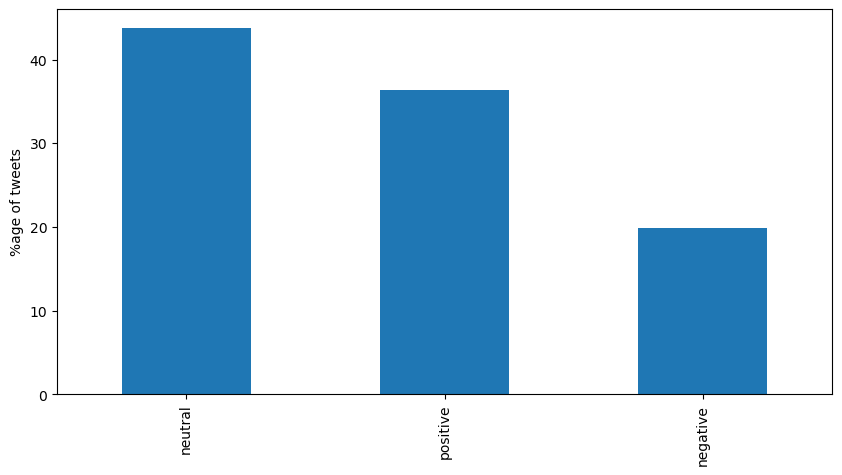

In [45]:
# Plot graph for analysis of Trump Tweets
plt.figure(figsize=(10,5)) 
(Trump_Tweets.analysis.value_counts(normalize=True)*100).plot.bar()
plt.ylabel("%age of tweets")
plt.show()

In [114]:
# BIDEN TWEETS

Biden_Tweets = Data_Mixed.query('(Candidate == "BIDEN")').sort_values('user_followers_count',ascending = False).drop_duplicates(['user_name'])[['tweet','country','state']]
Biden_Tweets = Biden_Tweets.dropna().loc[Biden_Tweets.country == 'US']


Biden_Tweets.reset_index(inplace = True, drop = True)

Biden_Tweets['ClearTweet'] = Biden_Tweets['tweet'].apply(clean)

 
Biden_Tweets['subjectivity']= Biden_Tweets['ClearTweet'].apply(getSubjectivity)
Biden_Tweets['polarity']    = Biden_Tweets['ClearTweet'].apply(getPolarity)
Biden_Tweets['analysis']    = Biden_Tweets['polarity'].apply(getAnalysis)
Biden_Tweets.head()


Biden_Tweets.head()

,tweet,country,state,ClearTweet,subjectivity,polarity,analysis
0,#JoeBiden is enlisting A-list star power to he...,US,California,joebiden is enlisting a list star power to hel...,0.00,0.00,neutral
1,While we were campaigning across battleground ...,US,Illinois,while we were campaigning across battleground ...,0.75,0.80,positive
2,The big fight TODAY!!!!! @realDonaldTrump vs #...,US,Nevada,the big fight today vs joebiden who you ...,0.10,0.00,neutral
3,"During his victory speech, #JoeBiden said he u...",US,California,during his victory speech joebiden said he un...,0.75,-0.75,negative
4,Los nueve minutos de colorida celebración tras...,US,Florida,los nueve minutos de colorida celebración tras...,0.00,0.00,neutral


In [47]:
Biden_Tweets.analysis.value_counts(normalize=True)*100

neutral     45.434415
positive    39.800541
negative    14.765044
Name: analysis, dtype: float64

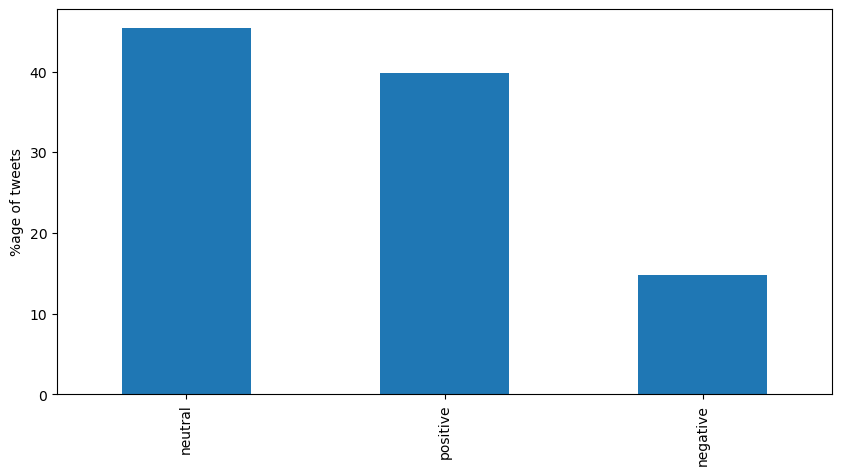

In [48]:
# Plot graph for analysis of Trump Tweets
plt.figure(figsize=(10,5)) 
(Biden_Tweets.analysis.value_counts(normalize=True)*100).plot.bar()
plt.ylabel("%age of tweets")
plt.show()

In [68]:
df_topic = Data_Mixed['tweet'].str.count('abortion')
df_topic

TypeError: list indices must be integers or slices, not str

In [83]:
Trump_Tweets[(Trump_Tweets['tweet'].str.contains('abortion'))]

,tweet,country,ClearTweet,subjectivity,polarity,analysis
594,#Florida | What do #Trump's Florida voters wan...,US,florida what do trump s florida voters want ...,0.425000,0.160000,positive
1274,Fact-checking Trump’s claim about Biden’s stan...,US,fact checking trump s claim about biden s stan...,0.500000,0.150000,positive
1476,#PrayerWarriors please #pray for the #suicidal...,US,prayerwarriors please pray for the suicidal jo...,0.366667,-0.166667,negative
1554,Stop with the lying @IvankaTrump - when you em...,US,stop with the lying when you emerge from th...,0.000000,0.000000,neutral
1882,I made a very vulnerable #ElectionDay video th...,US,i made a very vulnerable electionday video tha...,0.383333,-0.016667,negative
2177,So #AmyConeyBarrett spent days refusing to com...,US,so amyconeybarrett spent days refusing to comm...,0.097222,-0.033333,negative
2776,Yes! Vote #Trump!\n\nExcept for the abortion ...,US,yes vote trump except for the abortion thing...,0.260000,0.260000,positive
3008,A Donald #Trump supporter just crashed a memor...,US,a donald trump supporter just crashed a memori...,0.000000,-0.200000,negative
6947,#Trump clarified that he --to this day-- has n...,US,trump clarified that he to this day has no...,0.323810,0.015873,positive
7320,Perhaps no issue is now more consequential tha...,US,perhaps no issue is now more consequential tha...,0.750000,0.166667,positive


In [84]:
Biden_Tweets[(Biden_Tweets['tweet'].str.contains('abortion'))]

,tweet,country,ClearTweet,subjectivity,polarity,analysis
82,"#JoeBiden has claimed that ""Catholic social do...",US,joebiden has claimed that catholic social doc...,0.202778,0.038889,positive
760,#Florida | What do #Trump's Florida voters wan...,US,florida what do trump s florida voters want ...,0.425000,0.160000,positive
1658,Fact-checking Trump’s claim about Biden’s stan...,US,fact checking trump s claim about biden s stan...,0.500000,0.150000,positive
1932,#PrayerWarriors please #pray for the #suicidal...,US,prayerwarriors please pray for the suicidal jo...,0.366667,-0.166667,negative
2384,@philvischer A Dem divider who spews Marxism &...,US,a dem divider who spews marxism amp racism ...,0.428571,-0.004762,negative
3970,Kid1 : Make America Great Again\nMe: Almost pi...,US,make america great againme almost pissing ...,0.489583,0.293750,positive
4671,If someone is “truly“ a #Christian (believer) ...,US,if someone is truly a christian believer y...,0.405102,0.126531,positive
4954,#JoeBiden The guiding light that taught you th...,US,joebiden the guiding light that taught you the...,0.445000,-0.125000,negative
6856,@GeronimoFrost @JeffFlake I assume you are ref...,US,i assume you are referring inaccurately to a...,0.300000,0.300000,positive
7150,The same MSM ...\n&gt; blasphemed #God\n&gt; p...,US,the same msm gt blasphemed god gt promot...,0.125000,0.000000,neutral


In [20]:
state_df = Trump_Tweets.groupby(['state','analysis'])['tweet'].count().sort_values(ascending=False).head(20).reset_index()
state_df

,state,analysis,tweet
0,California,neutral,3052
1,California,positive,2479
2,New York,neutral,2105
3,Texas,neutral,1878
4,New York,positive,1836
5,Florida,neutral,1543
6,Texas,positive,1430
7,California,negative,1380
8,Florida,positive,1232
9,New York,negative,932
